# Deliverables and Functions

**This notebook contains a list of the helper functions used and the deliverables we have completed.**

In [118]:
%%capture
import pandas as pd
import numpy as np
import plotly.express as px
import wbdata
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

## Table of Contents

1. [A] [Population Statistics](#1-a-population-statistics)  
2. [A] [Unit Tests](#2-a-unit-tests)  
3. [A] [Population DataFrames](#3-a-population-dataframes)  
4. [B] [Population Pyramids](#4-b-population-pyramids)  
5. [C] [Animated Population Pyramids](#5-c-animated-population-pyramids)  
6. [C] [Population Maps](#6-c-population-maps)  
7. [C] [Other Visualization Tools](#7.-[C]-Other-Visualization-Tools)  

[Explore the helper functions used in this notebook](#Helper-Functions-Section)


#### 1. [A] Population Statistics

In [119]:
def population(year,sex,age_range,place,graph = False):
    """
    Calculate and visualize population data based on the given parameters.

    Parameters:
    -----------
    year : int
        A four-digit year (e.g., 2025).
    sex : str
        The sex category, either "MA" (male) or "FE" (female).
    age_range : list of int
        A list of two integers specifying the min and max age (e.g., [5, 20]).
    place : str
        A 3-character country code (e.g., "CHN" for China).
    graph : bool, optional
        Whether to generate a line plot (default is False).

    Returns:
    --------
    int
        The total population within the specified age range.

    Example:
    --------
    population(2021, "FE", [7, 23], "JPN", graph=True)
    """
    first_term = "SP"
    second_term = "POP"
    if sex == "MA":
        age_ranges = generateageranges(first_term, second_term, age_range, "MA", place, f"{year}-01-01")
        agearrayspecific, popvalues = interpprep(age_ranges)
        age_array_all_years = interpfunc(popvalues, agearrayspecific, place, year, graph_values = graph)
        sliced_popvals = age_array_all_years[age_range[0]:age_range[1]]
        finaloutput = np.sum(sliced_popvals)
        if finaloutput<2000:
            return "No data for this year"
        return finaloutput
    else:
        age_ranges = generateageranges(first_term, second_term, age_range, "FE", place, f"{year}-01-01")
        agearrayspecific, popvalues = interpprep(age_ranges)
        age_array_all_years = interpfunc(agearrayspecific, popvalues, place, year, graph_values = graph)
        sliced_popvals = age_array_all_years[age_range[0]:age_range[1]]
        finaloutput = np.sum(sliced_popvals)
        if finaloutput<2000:
            return "No data for this year"
        return finaloutput

/tmp/ipykernel_3081/1911097613.py:52: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



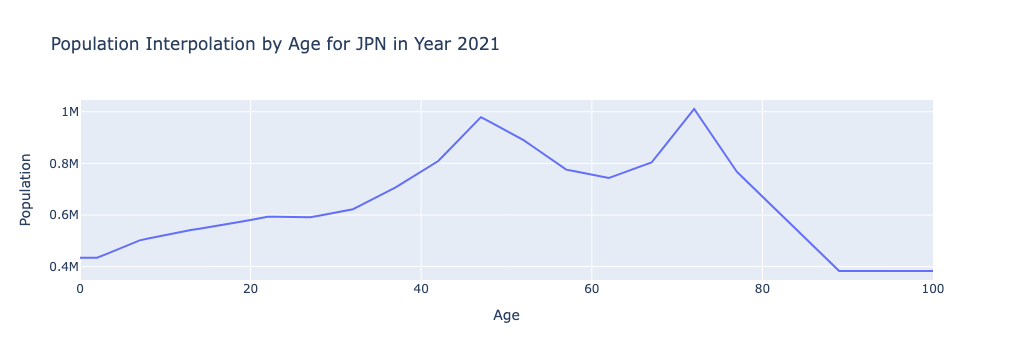

np.float64(8777315.0)

In [120]:
# example usage
population(2021, 'FE', [7,23], 'JPN', graph = True)

[Go To Population Helper Functions](#Population-Function-Helpers)

#### 2. [A] Unit Tests: NEED TO COMPLETE

#### 3. [A] Population DataFrames

In [121]:
def get_population_by_age_sex(countries):
    """
    Fetches population data by age and sex from the World Bank (source 40)
    and returns a pandas DataFrame indexed by Country/Region and Year.
    
    :param countries: List of country ISO codes or 'all' for all available.
    :param years: List of years as integers.
    :return: Pandas DataFrame with population counts by age and sex.
    """
    # Define indicators for population by age and sex (source 40)
    indicators = {
        "SP.POP.0004.MA": "Male 0-4",
        "SP.POP.0004.FE": "Female 0-4",
        "SP.POP.0509.MA": "Male 5-9",
        "SP.POP.0509.FE": "Female 5-9",
        "SP.POP.1014.MA": "Male 10-14",
        "SP.POP.1014.FE": "Female 10-14",
        "SP.POP.1519.MA": "Male 15-19",
        "SP.POP.1519.FE": "Female 15-19",
        "SP.POP.2024.MA": "Male 20-24",
        "SP.POP.2024.FE": "Female 20-24",
        "SP.POP.2529.MA": "Male 25-29",
        "SP.POP.2529.FE": "Female 25-29",
        "SP.POP.3034.MA": "Male 30-34",
        "SP.POP.3034.FE": "Female 30-34",
        "SP.POP.3539.MA": "Male 35-39",
        "SP.POP.3539.FE": "Female 35-39",
        "SP.POP.4044.MA": "Male 40-44",
        "SP.POP.4044.FE": "Female 40-44",
        "SP.POP.4549.MA": "Male 45-49",
        "SP.POP.4549.FE": "Female 45-49",
        "SP.POP.5054.MA": "Male 50-54",
        "SP.POP.5054.FE": "Female 50-54",
        "SP.POP.5559.MA": "Male 55-59",
        "SP.POP.5559.FE": "Female 55-59",
        "SP.POP.6064.MA": "Male 60-64",
        "SP.POP.6064.FE": "Female 60-64",
        "SP.POP.6569.MA": "Male 65-69",
        "SP.POP.6569.FE": "Female 65-69",
        "SP.POP.7074.MA": "Male 70-74",
        "SP.POP.7074.FE": "Female 70-74",
        "SP.POP.7579.MA": "Male 75-79",
        "SP.POP.7579.FE": "Female 75-79",
        "SP.POP.80UP.MA": "Male 80+",
        "SP.POP.80UP.FE": "Female 80+"
    }
    
    # Convert years to string format    
    # Fetch data from World Bank API
    df = wbdata.get_dataframe(indicators, country=countries,  parse_dates=True).squeeze()
    df = df.rename(columns={'date': 'Date'})
    
    return df

In [122]:
# example usage
SAcountries = {"BGD":"Bangladesh",
             "BTN":"Bhutan",
             "IND": "India",
             "MDV": "Maldives",
             "NPL": "Nepal",
             "PAK": "Pakistan",
             "LKA": "Sri Lanka",
             "TSA":"South Asia (IDA & IBRD)"
            }
SA_df = get_population_by_age_sex(SAcountries)
# this outputdf is used below as the input df for pop pyramids function

#### 4. [B] Population Pyramids

In [123]:
def plot_population_pyramid(df, country, date):
    """
    Plots a population pyramid for a given country and date.
    
    Parameters:
    df (DataFrame): Population data indexed by country and subindexed by date.
    country (str): The country code (e.g., 'IND' for India).
    date (str): The date in 'YYYY-MM-DD' format.
    """
    try:
        # Define age bins
        age_bins = ["0-4", "5-9", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", 
                    "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80+"]
        
        # Extract male and female populations
        male_population = df.loc[(country, date), [f"Male {bin}" for bin in age_bins]].values
        female_population = df.loc[(country, date), [f"Female {bin}" for bin in age_bins]].values
        
        # Convert to millions for better readability
        male_population /= 1e6
        female_population /= 1e6
        
        # Create the figure
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.barh(age_bins, -male_population, color='pink', label='Male')
        ax.barh(age_bins, female_population, color='orange', label='Female')
        
        # Labels and title
        ax.set_xlabel("Population (millions)")
        ax.set_ylabel("Age Group")
        ax.set_title(f"Population Pyramid for {country} on {date}")
        ax.legend()
        
        # Format x-axis
        ax.set_xticks([-max(male_population) * 1.2, 0, max(female_population) * 1.2])
        ax.set_xticklabels([f"{abs(int(x))}" for x in ax.get_xticks()])  # Remove negative signs
        
        plt.show()
    except KeyError:
        print(f"Data not available for {country} on {date}.")

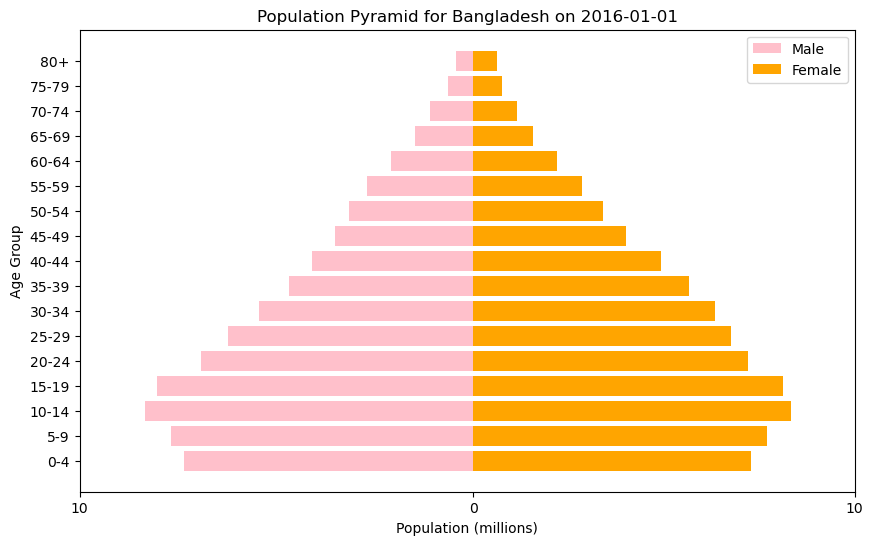

In [124]:
# example usage
plot_population_pyramid(SA_df, "Bangladesh", "2016-01-01")

#### 5. [C] Animated Population Pyramids

In [125]:
def animated_population_pyramid_wide(df, country, animate_by='year'):
    """
    Creates an animated population pyramid from a wide-format DataFrame with a (country, date) MultiIndex.
    
    Parameters
    ----------
    df : pd.DataFrame
        A wide-format DataFrame indexed by (country, date). The output of the population dataframes function
        Columns: "Male 0-4", "Male 5-9", ..., "Female 0-4", "Female 5-9", ...
    country : str
        The country or region name in the DataFrame's index (e.g., "Bangladesh", "South Asia").
    animate_by : str, optional
        'date' or 'year'. If 'year', we extract the year from the date for animation.
    
    Returns
    -------
    fig : plotly.graph_objs._figure.Figure
        An animated Plotly figure of the population pyramid over time.
    """
    
    # reset index to make country and date become columns
    df_reset = df.reset_index()  # now we have columns: ['country', 'date', 'Male 0-4', 'Female 0-4', ...]
    
    # unpivot to long format: create columns for 'age_sex' and 'population'
    df_long = df_reset.melt(
        id_vars=['country', 'date'],
        var_name='age_sex',
        value_name='population'
    )
    
    # splitting 'age_sex' into 'sex' (Male/Female) abd age group
    df_long[['sex','age_group']] = df_long['age_sex'].str.split(' ', n=1, expand=True)
    
    if animate_by == 'year':
        df_long['year'] = pd.to_datetime(df_long['date']).dt.year
    elif animate_by == 'date':
        # alternatively animate by full date string
        pass
    else:
        raise ValueError("animate_by must be either 'year' or 'date'.")
    
    # filter for the chosen country
    df_country = df_long[df_long['country'] == country].copy()
    
    # nultiply male population by -1 so males appear on the left side
    df_country.loc[df_country['sex'] == 'Male', 'population'] *= -1
    frame_col = 'year' if animate_by == 'year' else 'date'
    
    # build the animated bar chart
    fig = px.bar(
        df_country,
        x='population',
        y='age_group',
        color='sex',
        animation_frame=frame_col,
        orientation='h',
        range_x=[df_country['population'].min() * 1.1, df_country['population'].max() * 1.1],
        title=f"Animated Population Pyramid for {country}"
    )
    
    # age group order
    age_categories = [
        "0-4","5-9","10-14","15-19","20-24","25-29",
        "30-34","35-39","40-44","45-49","50-54","55-59",
        "60-64","65-69","70-74","75-79","80+"
    ]
    df_country['age_group'] = pd.Categorical(
        df_country['age_group'], 
        categories=age_categories, 
        ordered=True
    )
    fig.update_yaxes(categoryorder='array', categoryarray=age_categories)
    
    # final bits of design
    fig.update_layout(
        xaxis_title="Population (negative = Male, positive = Female)",
        yaxis_title="Age Group"
    )
    
    return fig


In [126]:
# example usage
fig = animated_population_pyramid_wide(SA_df, country="Pakistan", animate_by='year')
fig.show()

#### 6. [C] Population Maps

**Used plotly instead of geopandas for interactivity**

In [127]:
def popmap(df, year):
    """
    Creates an interactive choropleth map of population for the given year
    using Plotly Express.

    Parameters
    ----------
    df : pd.DataFrame
        A DataFrame indexed by year (e.g., "2020-01-01"), 
        with a multi-level index on columns:
            Level 0: ["Total Population", "Total Rural", "Total Urban", ...]
            Level 1: [country names]
        or something similar.
    year : str
        The row label corresponding to the desired year (e.g. "1960-01-01").
    """
    try:
        population_series = df.loc[year]  
    except KeyError:
        print(f"No data for {year}")
        return
    df2 = population_series.reset_index()
    df2.columns = ["Population_Type", "country", "population"]
    pop_df = df2[df2["Population_Type"] == "Total Population"].copy()
    pop_df.drop(columns="Population_Type", inplace=True)
    fig = px.choropleth(
        pop_df,
        locations='country',
        locationmode='country names',
        color='population',
        hover_name='country',
        color_continuous_scale='OrRd',
        title=f"Population Map - {year}",
        )
    fig.update_traces(marker_line_color="black", marker_line_width=2)
    fig.update_layout(legend_title_text='Population')
    fig.show()


In [128]:
# example usage
# note here that i am using the population dataframe output from function 7 below 'construct_dataframe'. 
pop = construct_dataframe({"BGD":"Bangladesh",
             "BTN":"Bhutan",
             "IND": "India",
             "MDV": "Maldives",
             "NPL": "Nepal",
             "PAK": "Pakistan",
             "LKA": "Sri Lanka",
             "TSA":"South Asia (IDA & IBRD)"
            }, 'Population', graph_output = False)
plot_population_map_interactive(pop, "2020-01-01")

#### 7. [C] Other Visualization Tools

Data analysis function to be used for final presentation. Runs through a cycle of many different graph types depending on desired analysis area. Currently built for either Population analysis ('Population'), Mortaity analysis ('Life'), and Agricultural analysis ('Food')

In [129]:
def construct_dataframe(countries_dict, analysis_type, graph_output = False, showtitles = False):
    """
    Constructs and returns a dataframe based on the selected analysis type for the given countries. 
    The function retrieves data from the World Bank API using the `wbdata.get_dataframe` method, 
    formats it, and optionally generates visualizations.

    Parameters:
    ----------
    countries_dict : dict
        A dictionary where keys are country codes and values are country names.
    analysis_type : str
        The type of analysis to perform. Accepted values:
        - 'Population': Retrieves and visualizes population-related metrics.
        - 'Life': Retrieves and visualizes life expectancy and mortality trends.
        - 'Food': Retrieves and visualizes agricultural and food production data.
    graph_output : bool, optional
        If True, generates graphs for the selected analysis type. Default is False.

    Returns:
    -------
    pandas.DataFrame
        A formatted dataframe containing the requested data for the selected countries 
        and analysis type. The dataframe is structured with years as the index.

    Displays:
    --------
    - Markdown headers describing the type of analysis.
    - A markdown-rendered data table after data retrieval.
    - Graphs if `graph_output` is set to True.

    Raises:
    -------
    ValueError
        If an unsupported analysis type is provided.

    Example:
    --------
    construct_dataframe({"CHN":"China",
             "JPN":"Japan",
             "MNG": "Mongolia",
             "KOR": "Korea, Rep",
             "HKG": "Hong Kong",
             "PRK": "Korea, Dem. People's Rep."
            }, 'Life', graph_output = True) 
    """
    countries = countries_dict
    if analysis_type == 'Population':
        if showtitles:
            display(Markdown("## Graphs of Population Trends\n*Below are the visualizations of the population data trends.*"))
        variable_labels = {"SP.POP.TOTL":"Total Population", 
                   "SP.POP.TOTL.FE.IN":"Total Female",
                  "SP.POP.TOTL.MA.IN":"Total Male",
                  "SP.RUR.TOTL":"Total Rural",
                  "SP.URB.TOTL":"Total Urban"
                  }
        SA_pop = wbdata.get_dataframe(variable_labels, country = countries,parse_dates=True).squeeze()
        SA_pop = SA_pop.unstack('country')
        SA_pop = SA_pop.reset_index()
        SA_pop = SA_pop.rename(columns={'date': 'Year'})
        SA_pop = SA_pop.set_index(['Year']).sort_index()
        if graph_output:
            for country in list(countries.values()):
                overlay_population(country, SA_pop)
        if showtitles:
            display(Markdown("### Population Stat Data Table.*"))
        return SA_pop
    if analysis_type == 'Life':
        if showtitles:
            display(Markdown("## Graphs of Mortality and Life Expectancy Trends\n*Below are the visualizations of the life related trends.*"))
        variable_labels = {"SP.DYN.AMRT.FE":"Mortality rate, adult, female (per 1,000 female adults)", 
                  "SP.DYN.AMRT.MA":"Mortality rate, adult, male (per 1,000 female adults)",
                   "SP.DYN.LE00.FE.IN":"Life Expectancy at Birth Female",
                  "SP.DYN.LE00.MA.IN":"Life Expectancy at Birth Male"
                  }
        lifedf = wbdata.get_dataframe(variable_labels, country = countries,parse_dates=True).squeeze()
        lifedf = lifedf.unstack('country')
        lifedf = lifedf.reset_index()
        lifedf = lifedf.rename(columns={'date': 'Year'})
        lifedf = lifedf.set_index(['Year']).sort_index()
        if graph_output:
            variable_labels = {col: col for col in lifedf.columns.get_level_values(0).unique()}
            generate_graphs(lifedf, variable_labels)
        if showtitles:
            display(Markdown("### Mortality and Life Expectancy Stat Data Table."))
        return lifedf
    if analysis_type == 'Food':
        if showtitles:
            display(Markdown("## Graphs of Different food trends Trends\n*Below are the visualizations of the food related trends.*"))
        variable_labels = {"AG.YLD.CREL.KG":"Cereal yield (kg per hectare)", 
                  "AG.LND.CREL.HA":"Land under cereal production (hectares)",
                   "AG.LND.CROP.ZS":"Permanent cropland (% of land area)"
                  }
        fooddf = wbdata.get_dataframe(variable_labels, country = countries,parse_dates=True).squeeze()
        fooddf = fooddf.unstack('country')
        fooddf = fooddf.reset_index()
        fooddf = fooddf.rename(columns={'date': 'Year'})
        fooddf = fooddf.set_index(['Year']).sort_index()
        if graph_output:
            variable_labels = {col: col for col in fooddf.columns.get_level_values(0).unique()}
            generate_graphs(fooddf, variable_labels)
        if showtitles:
            display(Markdown("### Mortality and Life Expectancy Stat Data Table."))
        return fooddf
    print('This is not currently an accepted analysis type. Please try either Life or Population')

[Explore the helper functions used in this function](#Helper-Functions-For-In-Depth-Visualization-Function-(construct_dataframe))

In [130]:
# example usage
# note a couple of customizeable options. The base output is the relevant dataframe, but there is also the optional arg
# to show the graphs and to show the titles (ex. 'Graphs of Population Trends')
pop = construct_dataframe({"CHN":"China",
             "JPN":"Japan",
             "MNG": "Mongolia",
             "KOR": "Korea, Rep",
             "HKG": "Hong Kong",
             "PRK": "Korea, Dem. People's Rep."
            }, 'Population', graph_output = True, showtitles = True)
pop

## Graphs of Population Trends
*Below are the visualizations of the population data trends.*

Country 'Korea, Rep' not found in the dataset.
Country 'Hong Kong' not found in the dataset.


### Population Stat Data Table.*

Total Population                                    \
country               China Hong Kong SAR, China        Japan   
Year                                                            
1960-01-01     6.670700e+08            3114671.0   93216000.0   
1961-01-01     6.603300e+08            3168100.0   94055000.0   
1962-01-01     6.657700e+08            3305200.0   94933000.0   
1963-01-01     6.823350e+08            3420900.0   95900000.0   
1964-01-01     6.983550e+08            3504600.0   96903000.0   
...                     ...                  ...          ...   
2019-01-01     1.407745e+09            7507900.0  126633000.0   
2020-01-01     1.411100e+09            7481000.0  126261000.0   
2021-01-01     1.412360e+09            7413100.0  125681593.0   
2022-01-01     1.412175e+09            7346100.0  125124989.0   
2023-01-01     1.410710e+09            7536100.0  124516650.0   

                                                            Total Female  \
country    Korea, Dem. People's Rep. Korea, Rep.   Mongolia        China   
Year                                                                       
1960-01-01                11722953.0  25012374.0   977595.0  326058670.0   
1961-01-01                11990713.0  25765673.0  1009284.0  323019123.0   
1962-01-01                12262882.0  26513030.0  1041444.0  325892138.0   
1963-01-01                12567057.0  27261747.0  1071362.0  334167831.0   
1964-01-01                12889770.0  27984155.0  1100234.0  342156294.0   
...                              ...         ...        ...          ...   
2019-01-01                26037632.0  51764822.0  3267673.0  688332681.0   
2020-01-01                26136312.0  51836239.0  3327204.0  690313465.0   
2021-01-01                26232534.0  51769539.0  3383741.0  691353011.0   
2022-01-01                26328845.0  51672569.0  3433748.0  691718700.0   
2023-01-01                26418204.0  51712619.0  3481145.0  691540464.0   

                                                                       ...  \
country    Hong Kong SAR, China       Japan Korea, Dem. People's Rep.  ...   
Year                                                                   ...   
1960-01-01            1527049.0  47910400.0                 6420780.0  ...   
1961-01-01            1553930.0  48318272.0                 6547394.0  ...   
1962-01-01            1620301.0  48735254.0                 6676112.0  ...   
1963-01-01            1676377.0  49192294.0                 6820425.0  ...   
1964-01-01            1723212.0  49660943.0                 6973765.0  ...   
...                         ...         ...                       ...  ...   
2019-01-01            4109737.0  64757100.0                13206827.0  ...   
2020-01-01            4102464.0  64578063.0                13250754.0  ...   
2021-01-01            4068311.0  64301379.0                13289964.0  ...   
2022-01-01            4032283.0  64036315.0                13326404.0  ...   
2023-01-01            4138892.0  63745563.0                13360198.0  ...   

           Total Rural                                                   \
country          Japan Korea, Dem. People's Rep. Korea, Rep.   Mongolia   
Year                                                                      
1960-01-01  34236372.0                 7010912.0  18081445.0   628799.0   
1961-01-01  33659463.0                 7055096.0  18414469.0   628966.0   
1962-01-01  33089846.0                 7095794.0  18702026.0   627678.0   
1963-01-01  32544624.0                 7148645.0  18972268.0   631504.0   
1964-01-01  32005123.0                 7205124.0  19204966.0   642702.0   
...                ...                       ...         ...        ...   
2019-01-01  10513072.0                 9859410.0   9612727.0  1027912.0   
2020-01-01  10376129.0                 9832219.0   9634283.0  1042846.0   
2021-01-01  10221684.0                 9799950.0   9621887.0  1056235.0   
2022-01-01  10066305.0                 976

---
\n
## Helper Functions Section

#### Population Function Helpers

In [131]:
#helper functions below
def generateageranges (first_term, second_term, age_range, sex, countrylabel, yearstring):
    age_min = age_range[0] # assuming list input
    age_max = age_range[1]
    listcodes3slot = []
    ageexact = np.arange(age_min, age_max+1)
    for age in ageexact:
        code = ""
        # if age < 25:
        #     if age < 10:
        #         code = "AG0" + f"{age}"
        #     else:
        #         code = "AG" + f"{age}"
        # else:
        agelist = [
            "0004",
            "0509",
            "1014",
            "1519",
            "2024",
            "2529",
            "3034",
            "3539",
            "4044",
            "4549",
            "5054",
            "5559",
            "6064",
            "6569",
            "7074",
            "7579",
            "80UP"
        ]
    
    #next section
    total = 0
    counter = ageexact[0]
    fulldict= {}
    #print(agelist)
    for code in agelist:
        inputval = f"{first_term}.{second_term}.{code}.{sex}"
        var_label = f"{code}"
        counter += 1
        fulldict[inputval] = var_label
    totaldf = wbdata.get_dataframe(fulldict, country=countrylabel, parse_dates=True)
    filteryear = totaldf.loc[yearstring]
    #print(filteryear)
    return filteryear

def interpprep(bucketed_vals, interpolatetype = 'cubic', midpoint_selection = [2,7,12,17,22,27,32,37,42,47,52,57,62,67,72,77,89]):
    midpoints = (bucketed_vals[:-1])/5
    finalbucket = bucketed_vals[-1]/20 #not sure how much to divide by. just doing 20 for 20 items 80-100
    midpoints = pd.concat([midpoints, pd.Series([finalbucket])], ignore_index=True)
    #u can make outputs transparent below
    #print(f"midpoints are {midpoints}. These can be changed if we want to take a new approach to better account for very old ages (100+)")
    #print(f"ages are {midpoint_selection}")
    return midpoint_selection, midpoints

def interpfunc(age_midpoints, pop_values, country, year, max_age=100, graph_values = False):
    bucketed_vals = np.array(pop_values)
    midpoint_selection = np.array(age_midpoints)
    age_range = np.arange(0, max_age + 1)  # ages from 0 to max_age
    #interp time
    interpolated_values = np.interp(age_range, midpoint_selection, bucketed_vals)
    #optional graph
    if graph_values:
        popdf = pd.DataFrame({'Age': age_range, 'Population': interpolated_values})
        fig = px.line(popdf, x='Age', y='Population', title=f'Population Interpolation by Age for {country} in Year {year}')
        fig.show()
    return interpolated_values



#### Helper Functions For In Depth Visualization Function (construct_dataframe)

In [132]:
def generate_graphs(lifedf, variable_labels):
    """
    Generate time-series graphs using Plotly, where each line represents a country,
    and each graph corresponds to a different statistic.

    Parameters:
        lifedf (DataFrame): DataFrame with life-related statistics.
        variable_labels (dict): Mapping of column names to descriptive labels.
    """
    for variable, label in variable_labels.items():
        fig = go.Figure()
        # quick check for existing variable
        if variable not in lifedf.columns:
            print(f"Skipping {variable}: Not found in DataFrame")
            continue
        for country in lifedf[variable].columns:
            data = lifedf[variable][country].dropna()  # Remove NaNs
            #adding country specific lines
            fig.add_trace(go.Scatter(
                x=data.index, 
                y=data.values, 
                mode='lines+markers', 
                name=country
            ))
        fig.update_layout(
            title=f"{label} Over Time",
            xaxis_title="Year",
            yaxis_title="Value",
            legend_title="Country"
        )

        # Show the figure
        fig.show()


In [133]:
def overlay_population(country_name, df):
    """
    Function to overlay female and male population for a given country.

    Parameters:
    - country_name (str): The name of the country whose data will be plotted.
    - df (pd.DataFrame): The DataFrame containing the population data with MultiIndex columns.

    Returns:
    - A Plotly figure with the overlayed female and male population data.
    """
    
    # Check if the country exists in the subcolumns
    if country_name not in df.columns.get_level_values('country'):
        print(f"Country '{country_name}' not found in the dataset.")
        return
    
    # Extract the female and male population data for the country
    female = df[('Total Female', country_name)]
    male = df[('Total Male', country_name)]
    
    # Create a figure
    fig = go.Figure()
    
    # Add the female population plot
    fig.add_trace(go.Scatter(x=female.index, y=female, mode='lines+markers', name='Female', line=dict(dash='dash', color='blue')))
    
    # Add the male population plot
    fig.add_trace(go.Scatter(x=male.index, y=male, mode='lines+markers', name='Male', line=dict(dash='solid', color='red')))
    
    # Add title and labels
    fig.update_layout(title=f"Total Female and Male Population Over Time ({country_name})",
                      xaxis_title="Year",
                      yaxis_title="Population")
    
    # Show the plot
    fig.show()

#### Search Function to Find Region Acronym

This is another optional function created for easy region searching. Its input is a search country or any part of a country and the output is the list of acronym country pairs containing that input.

In [134]:
def acronymfinder(country): #helpful func to find region acronym by putting in full text
    """
    Finds and prints region acronyms (country IDs) by searching for a matching 
    country name containing the input string.

    This function retrieves a list of countries and their corresponding region 
    acronyms (IDs) using the `wbdata.get_countries()` method. It then searches 
    for country names that contain the given input string (case-insensitive) 
    and prints the matching country names along with their acronyms.

    Parameters:
        country (str): The substring to search for in country names.

    Returns:
        str: A message indicating no matching countries were found if no matches exist.
        None: If matches are found, it prints the matching country names and acronyms 
              and does not return a value.
    
    Example:
        # Assuming wbdata.get_countries() returns:
        # [{'name': 'United States', 'id': 'USA'}, {'name': 'United Kingdom', 'id': 'GBR'}, {'name': 'India', 'id': 'IND'}]
        
        acronymfinder("United")
        # Output:
        # United States: USA
        # United Kingdom: GBR
        
        result = acronymfinder("XYZ")
        # Output: 'no matching countries, please try a different input'
        print(result)
        # Output: 'no matching countries, please try a different input'
    """
    country_dict = wbdata.get_countries()
    matchedacronym = ""
    country_mapping = {country['name']: country['id'] for country in country_dict}
    output = False
    for country_name in country_mapping.keys():
        if country.lower() in country_name.lower():
            print(f"{country_name}: {country_mapping[country_name]}")
            output = True
    if not output:
        return 'no matching countries, please try a different input'


In [135]:
# example usage
acronymfinder('united')

United Arab Emirates: ARE
United Kingdom: GBR
United States: USA


<h1><center>End of Deliverable Notebook</center></h1>